In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Data** **Loading**

In [ ]:
# df = pd.read_csv('DSU_Dataset.csv')
# df.shape

In [ ]:
#dividing data based on High Cost Claim
# train_data = df[df['High Cost Claim'].isin([0, 1])]
# test_data = df[df['High Cost Claim'].isna()]

In [ ]:
# train_data.shape, test_data.shape

In [ ]:
data = pd.read_csv('train_data.csv')
data.shape

(203250, 31)

In [ ]:
# data = train_data
# datatest = test_data
# data.to_csv('train_data.csv', index=False)
# data1.to_csv('test_data.csv', index=False)
data.head()

,Claim ID,Service Date,Recieved Date,Paid Date,Patient ID,Member Age,Gender,Marital Status,Ethnicity,LOB,...,ICD10 Code 5,ICD10 Code 6,ICD10 Code 7,ICD10 Code 8,ICD10 Code 9,ICD10 Code 10,Service Type,Service Code,Modifiers,High Cost Claim
0,190430199dfa0b3ed46212060301b3d743d64f958fa505...,05-01-2022,06-01-2022,10-01-2022,79c25d5d6a0cec975ddcd349f1c431eec1ff698295e752...,10-19 Yrs Old,M,Single,Caucasian/White,NPS,...,NaN,NaN,NaN,NaN,NaN,NaN,PROC,73630,"TC,LT",0.0
1,cac4ce65912da45e6350bf9528623f921762a436056721...,28-12-2021,30-12-2021,03-01-2022,2fe692eb90cbcb4a2afa053ac41691f4a93f7acbd8c357...,50-59 Yrs Old,F,Divorced,Caucasian/White,NPS,...,NaN,NaN,NaN,NaN,NaN,NaN,PROC,87426,NaN,0.0
2,e01f80a521e095d6fe969a0342a74c23d886c0e324d314...,05-01-2022,06-01-2022,13-01-2022,64c05a5a40591a5f00d0868167a22d37515c65581dd511...,1-9 Yrs Old,F,Single,Caucasian/White,SGH,...,NaN,NaN,NaN,NaN,NaN,NaN,PROC,90670,NaN,0.0
3,e01f80a521e095d6fe969a0342a74c23d886c0e324d314...,05-01-2022,06-01-2022,13-01-2022,64c05a5a40591a5f00d0868167a22d37515c65581dd511...,1-9 Yrs Old,F,Single,Caucasian/White,SGH,...,NaN,NaN,NaN,NaN,NaN,NaN,PROC,90460,NaN,0.0
4,e01f80a521e095d6fe969a0342a74c23d886c0e324d314...,05-01-2022,06-01-2022,13-01-2022,64c05a5a40591a5f00d0868167a22d37515c65581dd511...,1-9 Yrs Old,F,Single,Caucasian/White,SGH,...,NaN,NaN,NaN,NaN,NaN,NaN,PROC,90697,NaN,0.0


**DATA CLEANING AND EDA**




In [ ]:
# Remove all duplicate rows (keeping only unique rows)
data = data.drop_duplicates()

# Display the updated dataset shape
print(f"Dataset shape after removing all duplicate rows: {data.shape}")


Dataset shape after removing all duplicate rows: (189748, 31)


In [ ]:
# Calculate unique values in each column
unique_values = data.nunique()

# Calculate missing values in each column
missing_values = data.isnull().sum()

# Calculate the percentage of missing values in each column
missing_percentage = (missing_values / len(data)) * 100

# Combine results into a single DataFrame for better readability
summary = pd.DataFrame({
    'Unique Values': unique_values,
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage
}).sort_values(by='Missing Percentage (%)', ascending=False)

df = summary.reset_index()
df.columns = ['Column Name', 'Unique Values', 'Missing Values', 'Missing Percentage (%)']
df


,Column Name,Unique Values,Missing Values,Missing Percentage (%)
0,ICD10 Code 10,962,170921,90.077893
1,ICD10 Code 9,1122,167575,88.314501
2,ICD10 Code 8,1400,163152,85.983515
3,ICD10 Code 7,1660,157648,83.082826
4,ICD10 Code 6,2136,149744,78.917301
5,ICD10 Code 5,2539,139927,73.743597
6,Modifiers,1088,131046,69.063179
7,ICD10 Code 4,3519,120494,63.502119
8,ICD10 Code 3,4358,96390,50.798954
9,ICD10 Code 2,5661,59458,31.335245


In [ ]:
# List of columns to remove DUE TO MISSING VALUES GREATER THAN 50%
columns_to_remove = [
    'ICD10 Code 10',
    'ICD10 Code 9',
    'ICD10 Code 8',
    'ICD10 Code 7',
    'ICD10 Code 6',
    'ICD10 Code 5',
    'Modifiers',
    'ICD10 Code 4'

]

# Drop the columns from the dataset
data = data.drop(columns=columns_to_remove)

# Display the updated dataset shape
print(f"Updated dataset shape: {data.shape}")


Updated dataset shape: (189748, 23)


In [ ]:
data.head()

,Claim ID,Service Date,Recieved Date,Paid Date,Patient ID,Member Age,Gender,Marital Status,Ethnicity,LOB,...,Claim Line,Place of Service,Provider Type,Provider Specialty,ICD10 Code 1,ICD10 Code 2,ICD10 Code 3,Service Type,Service Code,High Cost Claim
0,190430199dfa0b3ed46212060301b3d743d64f958fa505...,05-01-2022,06-01-2022,10-01-2022,79c25d5d6a0cec975ddcd349f1c431eec1ff698295e752...,10-19 Yrs Old,M,Single,Caucasian/White,NPS,...,MEDICAL,OFFICE,Physician,DIAGNOSTIC RADIOLOGY (RADIOLOGY),2.0,NaN,NaN,PROC,73630,0.0
1,cac4ce65912da45e6350bf9528623f921762a436056721...,28-12-2021,30-12-2021,03-01-2022,2fe692eb90cbcb4a2afa053ac41691f4a93f7acbd8c357...,50-59 Yrs Old,F,Divorced,Caucasian/White,NPS,...,MEDICAL,OFFICE,Physician,PATHOLOGY,3.0,NaN,NaN,PROC,87426,0.0
2,e01f80a521e095d6fe969a0342a74c23d886c0e324d314...,05-01-2022,06-01-2022,13-01-2022,64c05a5a40591a5f00d0868167a22d37515c65581dd511...,1-9 Yrs Old,F,Single,Caucasian/White,SGH,...,MEDICAL,OFFICE,Physician,PEDIATRICS,4.0,5.0,NaN,PROC,90670,0.0
3,e01f80a521e095d6fe969a0342a74c23d886c0e324d314...,05-01-2022,06-01-2022,13-01-2022,64c05a5a40591a5f00d0868167a22d37515c65581dd511...,1-9 Yrs Old,F,Single,Caucasian/White,SGH,...,MEDICAL,OFFICE,Physician,PEDIATRICS,4.0,5.0,NaN,PROC,90460,0.0
4,e01f80a521e095d6fe969a0342a74c23d886c0e324d314...,05-01-2022,06-01-2022,13-01-2022,64c05a5a40591a5f00d0868167a22d37515c65581dd511...,1-9 Yrs Old,F,Single,Caucasian/White,SGH,...,MEDICAL,OFFICE,Physician,PEDIATRICS,4.0,5.0,NaN,PROC,90697,0.0


In [ ]:
# data.to_csv('train_data1.csv', index=False)

In [ ]:
data.describe()

,ICD10 Code 1,ICD10 Code 2,ICD10 Code 3,High Cost Claim
count,189026.000000,130290.000000,93358.000000,189748.000000
mean,1422.812417,1350.939090,1311.165213,0.068064
std,2184.491759,2053.227827,2044.732832,0.251856
min,0.000000,0.000000,0.000000,0.000000
25%,110.000000,117.000000,96.000000,0.000000
50%,511.000000,530.000000,486.000000,0.000000
75%,1646.000000,1565.000000,1473.000000,0.000000
max,11323.000000,11327.000000,11316.000000,1.000000


In [ ]:
# Count unique values for Claim ID and Patient ID
unique_claim_id_count = data['Claim ID'].nunique()
unique_patient_id_count = data['Patient ID'].nunique()

print(f"Unique Claim ID Count: {unique_claim_id_count}")
print(f"Unique Patient ID Count: {unique_patient_id_count}")

# Find rows where both Claim ID and Patient ID are unique
unique_rows = data.drop_duplicates(subset=['Claim ID', 'Patient ID'])

# Display the number of rows where both are unique
print(f"Number of rows where both Claim ID and Patient ID are unique: {unique_rows.shape[0]}")



Unique Claim ID Count: 88523
Unique Patient ID Count: 60949
Number of rows where both Claim ID and Patient ID are unique: 88523


In [ ]:
data.isnull().sum()

,0
Claim ID,0
Service Date,0
Recieved Date,0
Paid Date,0
Patient ID,0
Member Age,0
Gender,0
Marital Status,9525
Ethnicity,20162
LOB,0


In [ ]:
#data.to_csv('train_data2.csv', index=False)

In [ ]:
# Display unique values in 'Claim Category' and 'Claim Subcategory'
print("Unique Claim Categories:\n", data['Claim Category'].unique())
print("\nUnique Claim Subcategories:\n", data['Claim Subcategory'].unique())


Unique Claim Categories:
 ['PROFESSIONAL' 'LAB SERVICES' 'OUTPATIENT' 'INPATIENT' 'NOT CLASSIFIED'
 nan 'HOSPICE']

Unique Claim Subcategories:
 ['OFFICE VISIT' 'INDEPENDENT LABORATORY'
 'SUBSTANCE ABUSE AND BEHAVIORAL HEALTH SERVICES' 'ACUTE INPATIENT'
 'OUTPATIENT' 'TELEMEDICINE' 'EMERGENCY' 'HOME VISIT' 'URGENT CARE'
 'NOT CLASSIFIED' 'INPATIENT PSYCHIATRIC CARE' 'SKILLED NURSING'
 'OBSERVATION' 'OTHER INPATIENT' 'PHARMACY'
 'RESIDENTIAL FACILITY SERVICES' 'AMBULANCE' 'SPECIMEN ONLY'
 'NURSING FACILITY' 'HOME HEALTH' 'SKILLED NURSING PART B'
 'INPATIENT REHABILITATION CARE' nan 'HOSPICE' 'INPATIENT PART B']


In [ ]:
print("Most Frequent 'Claim Category':")
print(data['Claim Category'].value_counts().head(10))  # Top 10 common values

print("\nMost Frequent 'Claim Subcategory':")
print(data['Claim Subcategory'].value_counts().head(10))  # Top 10 common values

Most Frequent 'Claim Category':
Claim Category
PROFESSIONAL      117970
OUTPATIENT         45824
INPATIENT          14578
LAB SERVICES       11337
NOT CLASSIFIED        31
HOSPICE                7
Name: count, dtype: int64

Most Frequent 'Claim Subcategory':
Claim Subcategory
OFFICE VISIT              93227
OUTPATIENT                43970
ACUTE INPATIENT           17716
EMERGENCY                 13884
INDEPENDENT LABORATORY    11156
HOME VISIT                 4653
TELEMEDICINE               1017
OBSERVATION                 776
NOT CLASSIFIED              698
URGENT CARE                 697
Name: count, dtype: int64


In [ ]:
# REPLACD null values to PROFESSIONAL in Claim Category and OFFICE VISIT in Claim Subcategory BASED ON OTHER COLUMNS similarities.

data['Claim Category'] = data['Claim Category'].fillna('PROFESSIONAL')
data['Claim Subcategory'] = data['Claim Subcategory'].fillna('OFFICE VISIT')


In [ ]:
data.isnull().sum()

,0
Claim ID,0
Service Date,0
Recieved Date,0
Paid Date,0
Patient ID,0
Member Age,0
Gender,0
Marital Status,9525
Ethnicity,20162
LOB,0


In [ ]:
print("Most Frequent 'Provider Type' Before Filling:")
print(data['Provider Type'].value_counts().head(5))  # Show top 5 most common values

print("\nMost Frequent 'Provider Specialty' Before Filling:")
print(data['Provider Specialty'].value_counts().head(5))  # Show top 5 most common values

Most Frequent 'Provider Type' Before Filling:
Provider Type
Physician                       70573
Resource                        69434
Certified Nurse Practitioner    15596
Doctor Of Chiropractic           9552
Physical Therapist               4961
Name: count, dtype: int64

Most Frequent 'Provider Specialty' Before Filling:
Provider Specialty
ACUTE CARE HOSPITAL (GENERAL)       59191
FAMILY MEDICINE                     17004
CHIROPRACTOR                        10716
DIAGNOSTIC RADIOLOGY (RADIOLOGY)     8831
NP - FAMILY MEDICINE                 7642
Name: count, dtype: int64


In [ ]:
# Display unique values in 'Provider Type' and 'Provider Specialty'
print("Unique Provider Type:\n", data['Provider Type'].unique())
print("\nUnique Claim Provider Specialty:\n", data['Provider Specialty'].unique())

Unique Provider Type:
 ['Physician' 'Occupational Therapist' 'Doctor Of Chiropractic' 'Counselor'
 'Certified Registered Nurse Anesthetist' 'Audiologist'
 'Certified Nurse Practitioner' 'Physician Assistant' 'Resource'
 'Doctor of Optometry' 'Physician Assistant Certified'
 'Licensed Professional Counselor' 'Social Worker' 'Physical Therapist'
 'Radiologist' 'Mental Health Counselor' 'Psychologist'
 'Speech Pathologist' 'Clinical Social Worker' 'Certified Nurse Midwife'
 'Doctor Of Dental Surgery' 'Doctor of Podiatric Medicine'
 'Licensed Associate Professional Counselor' 'BH Practitioner'
 'Licensed Marriage and Family Therapist' 'MEDICAL PHYSICIST'
 'Provisional SLP' 'Licensed Clinical Professional Counselor'
 'Registered Dietitian' 'Licensed Registered Dietitian'
 'Addictions Counselor' 'Optician' 'Behavior Analyst'
 'Clinical Nurse Specialist' 'Advanced Practice RN'
 'Doctor of Dental Medicine' 'Integrated Therapy'
 'Student Registered Nurse Anesthetist' 'BEHAVIORAL THERAPIST'
 'Ps

In [ ]:
#filling provider speciality fill with CERTIFIED REGISTERED NURSE ANESTHETIST filled with physican using excel.
data['Provider Type'] = data['Provider Type'].fillna('Physician')
data['Provider Specialty'] = data['Provider Specialty'].fillna('ACUTE CARE HOSPITAL (GENERAL)')

In [ ]:
data.isnull().sum()

,0
Claim ID,0
Service Date,0
Recieved Date,0
Paid Date,0
Patient ID,0
Member Age,0
Gender,0
Marital Status,9525
Ethnicity,20162
LOB,0


**Creating new features**

In [ ]:
# Create a new feature: count of Claim ID based on Service Code
data['Claim Count by Service Code'] = data.groupby('Service Code')['Claim ID'].transform('count')

In [ ]:
# Convert date columns to datetime format
data['Service Date'] = pd.to_datetime(data['Service Date'], format="%d-%m-%Y")
data['Recieved Date'] = pd.to_datetime(data['Recieved Date'], format="%d-%m-%Y")
data['Paid Date'] = pd.to_datetime(data['Paid Date'], format="%d-%m-%Y")

# Create new features
data['Claim Processing Time'] = (data['Recieved Date'] - data['Service Date']).dt.days
data['Claim Payment Time'] = (data['Paid Date'] - data['Recieved Date']).dt.days
data['Total Claim Duration'] = (data['Paid Date'] - data['Service Date']).dt.days

In [ ]:
data.head()

,Claim ID,Service Date,Recieved Date,Paid Date,Patient ID,Member Age,Gender,Marital Status,Ethnicity,LOB,...,ICD10 Code 1,ICD10 Code 2,ICD10 Code 3,Service Type,Service Code,High Cost Claim,Claim Count by Service Code,Claim Processing Time,Claim Payment Time,Total Claim Duration
0,190430199dfa0b3ed46212060301b3d743d64f958fa505...,2022-01-05,2022-01-06,2022-01-10,79c25d5d6a0cec975ddcd349f1c431eec1ff698295e752...,10-19 Yrs Old,M,Single,Caucasian/White,NPS,...,2.0,NaN,NaN,PROC,73630,0.0,548,1,4,5
1,cac4ce65912da45e6350bf9528623f921762a436056721...,2021-12-28,2021-12-30,2022-01-03,2fe692eb90cbcb4a2afa053ac41691f4a93f7acbd8c357...,50-59 Yrs Old,F,Divorced,Caucasian/White,NPS,...,3.0,NaN,NaN,PROC,87426,0.0,225,2,4,6
2,e01f80a521e095d6fe969a0342a74c23d886c0e324d314...,2022-01-05,2022-01-06,2022-01-13,64c05a5a40591a5f00d0868167a22d37515c65581dd511...,1-9 Yrs Old,F,Single,Caucasian/White,SGH,...,4.0,5.0,NaN,PROC,90670,0.0,129,1,7,8
3,e01f80a521e095d6fe969a0342a74c23d886c0e324d314...,2022-01-05,2022-01-06,2022-01-13,64c05a5a40591a5f00d0868167a22d37515c65581dd511...,1-9 Yrs Old,F,Single,Caucasian/White,SGH,...,4.0,5.0,NaN,PROC,90460,0.0,630,1,7,8
4,e01f80a521e095d6fe969a0342a74c23d886c0e324d314...,2022-01-05,2022-01-06,2022-01-13,64c05a5a40591a5f00d0868167a22d37515c65581dd511...,1-9 Yrs Old,F,Single,Caucasian/White,SGH,...,4.0,5.0,NaN,PROC,90697,0.0,122,1,7,8


In [ ]:
# data.to_csv('train_data3.csv', index=False)

**DATA PREPROCESSING**

ConvertIng catergorical columns to numerical values

In [ ]:
# Define a dictionary to map categorical age groups to numerical values
age_mapping = {
    "< 1 Yrs Old": 0,
    "1-9 Yrs Old": 5,
    "10-19 Yrs Old": 15,
    "20-29 Yrs Old": 25,
    "30-39 Yrs Old": 35,
    "40-49 Yrs Old": 45,
    "50-59 Yrs Old": 55,
    "60-69 Yrs Old": 65,
    "70-79 Yrs Old": 75,
    "80-89 Yrs Old": 85,
    "90-99 Yrs Old": 95,
    "100+ Yrs Old": 100
}

# Apply the mapping to the 'Member Age' column
data['Member Age'] = data['Member Age'].map(age_mapping)

# Display the updated dataframe
print(data[['Member Age']].head())  # Check the transformed column


   Member Age
0          15
1          55
2           5
3           5
4           5


In [ ]:
# Frequency Encoding for 'LOB'
lob_counts = data['LOB'].value_counts().to_dict()
data['LOB'] = data['LOB'].map(lob_counts)

# Display transformed column
print(data[['LOB']].head())


     LOB
0  39658
1  39658
2  36857
3  36857
4  36857


In [ ]:
# Mapping Gender values to numerical labels
gender_mapping = {'M': 0, 'F': 1}
data['Gender'] = data['Gender'].map(gender_mapping)

# Display transformed column
print(data[['Gender']].head())


   Gender
0     0.0
1     1.0
2     1.0
3     1.0
4     1.0


In [ ]:
# Frequency Encoding for 'Network Status'
network_status_counts = data['Network Status'].value_counts().to_dict()
data['Network Status'] = data['Network Status'].map(network_status_counts)


# Display transformed column
print(data[['Network Status']].head())


   Network Status
0           60221
1           60221
2          114228
3          114228
4          114228


In [ ]:
# Frequency Encoding for 'Ethnicity'
Ethnicity_counts = data['Ethnicity'].value_counts().to_dict()
data['Ethnicity'] = data['Ethnicity'].map(Ethnicity_counts)


# Display transformed column
print(data[['Ethnicity']].head())

   Ethnicity
0   154935.0
1   154935.0
2   154935.0
3   154935.0
4   154935.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Claim Category'] = label_encoder.fit_transform(data['Claim Category'])


In [ ]:
data = pd.get_dummies(data, columns=['Claim Line'], drop_first=True)

# Convert boolean columns to integer (0 and 1) to ensure compatibility with ML models
one_hot_columns = [col for col in data.columns if 'Claim Line_' in col]
data[one_hot_columns] = data[one_hot_columns].astype(int)

# Display transformed dataset

In [ ]:
# Frequency Encoding for 'Place of Service'
Place_of_Service_counts = data['Place of Service'].value_counts().to_dict()
data['Place of Service'] = data['Place of Service'].map(Place_of_Service_counts)


# Display transformed column
print(data[['Place of Service']].head())


   Place of Service
0             90552
1             90552
2             90552
3             90552
4             90552


In [ ]:
# Count unique values in 'Provider Type'
provider_type_counts = data['Provider Type'].value_counts()

display(provider_type_counts)


,count
Provider Type,
Physician,70579
Resource,69434
Certified Nurse Practitioner,15596
Doctor Of Chiropractic,9552
Physical Therapist,4961
Physician Assistant,4276
Physician Assistant Certified,2745
Counselor,1508
Doctor of Optometry,1286


In [ ]:
# Count unique values in 'Provider Type'
provider_type_counts = data['Provider Specialty'].value_counts()

display(provider_type_counts)

,count
Provider Specialty,
ACUTE CARE HOSPITAL (GENERAL),59192
FAMILY MEDICINE,17004
CHIROPRACTOR,10716
DIAGNOSTIC RADIOLOGY (RADIOLOGY),8831
NP - FAMILY MEDICINE,7642
...,...
"PA - ENDOCRINOLOGY, DIABETES AND METABOLISM",1
HOSPICE AND PALLIATIVE MEDICINE (ANESTHESIOLOGY),1
HOSPICE AND PALLIATIVE MEDICINE (PEDIATRICS),1


In [ ]:
# Frequency Encoding for 'Provider Type'
Provider_Type_counts = data['Provider Type'].value_counts().to_dict()
data['Provider Type'] = data['Provider Type'].map(Provider_Type_counts)


# Display transformed column
print(data[['Provider Type']].head())

   Provider Type
0          70579
1          70579
2          70579
3          70579
4          70579


In [ ]:
data.head()


,Claim ID,Service Date,Recieved Date,Paid Date,Patient ID,Member Age,Gender,Marital Status,Ethnicity,LOB,...,ICD10 Code 2,ICD10 Code 3,Service Type,Service Code,High Cost Claim,Claim Count by Service Code,Claim Processing Time,Claim Payment Time,Total Claim Duration,Claim Line_PHARMACY
0,190430199dfa0b3ed46212060301b3d743d64f958fa505...,2022-01-05,2022-01-06,2022-01-10,79c25d5d6a0cec975ddcd349f1c431eec1ff698295e752...,15,0.0,Single,154935.0,39658,...,NaN,NaN,PROC,73630,0.0,548,1,4,5,0
1,cac4ce65912da45e6350bf9528623f921762a436056721...,2021-12-28,2021-12-30,2022-01-03,2fe692eb90cbcb4a2afa053ac41691f4a93f7acbd8c357...,55,1.0,Divorced,154935.0,39658,...,NaN,NaN,PROC,87426,0.0,225,2,4,6,0
2,e01f80a521e095d6fe969a0342a74c23d886c0e324d314...,2022-01-05,2022-01-06,2022-01-13,64c05a5a40591a5f00d0868167a22d37515c65581dd511...,5,1.0,Single,154935.0,36857,...,5.0,NaN,PROC,90670,0.0,129,1,7,8,0
3,e01f80a521e095d6fe969a0342a74c23d886c0e324d314...,2022-01-05,2022-01-06,2022-01-13,64c05a5a40591a5f00d0868167a22d37515c65581dd511...,5,1.0,Single,154935.0,36857,...,5.0,NaN,PROC,90460,0.0,630,1,7,8,0
4,e01f80a521e095d6fe969a0342a74c23d886c0e324d314...,2022-01-05,2022-01-06,2022-01-13,64c05a5a40591a5f00d0868167a22d37515c65581dd511...,5,1.0,Single,154935.0,36857,...,5.0,NaN,PROC,90697,0.0,122,1,7,8,0


In [ ]:
# Count unique values in 'Service Type'
Service_type_counts = data['Service Type'].value_counts()
Service_Code_counts = data['Service Code'].value_counts()

display(Service_type_counts,Service_Code_counts)

,count
Service Type,
PROC,171218
REV,17618
DRG,912


,count
Service Code,
99213,9758
99214,6663
36415,6455
98941,4323
90837,3110
...,...
40654,1
64451,1
92583,1


In [ ]:
# Calculate percentage of high-cost claims for each service code
service_code_high_cost_ratio = data.groupby('Service Code')['High Cost Claim'].mean().reset_index()

# Display the top Service Codes with the highest High Cost Claim ratios
service_code_high_cost_ratio.sort_values(by='High Cost Claim', ascending=False).head(10)


,Service Code,High Cost Claim
1260,63685,1.0
4227,MS095,1.0
452,25545,1.0
4238,MS167,1.0
4237,MS166,1.0
4234,MS163,1.0
4232,MS144,1.0
4230,MS114,1.0
4226,MS094,1.0
443,252,1.0


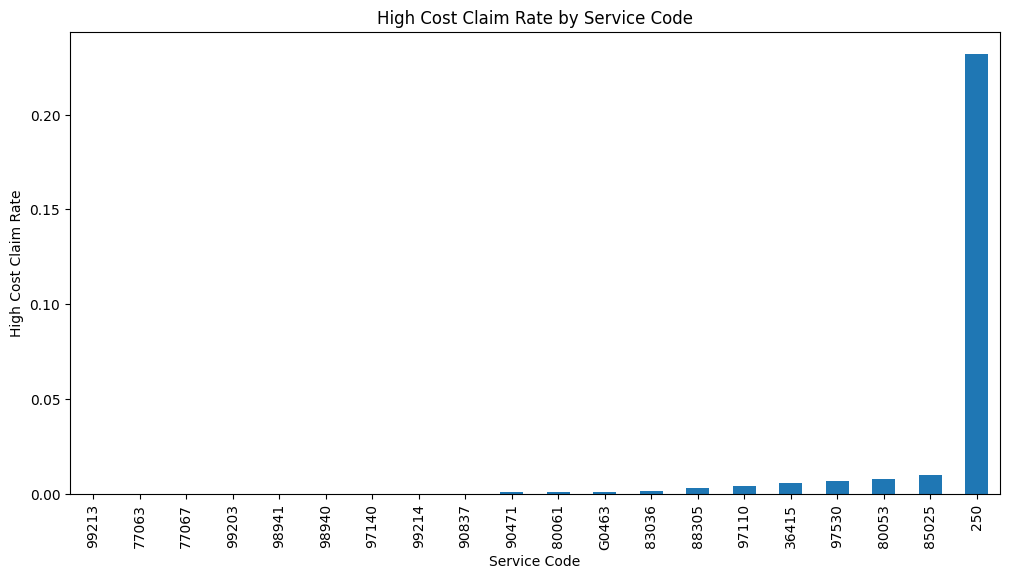

In [ ]:
import matplotlib.pyplot as plt

# Select top 20 most frequent Service Codes
top_service_codes = data['Service Code'].value_counts().index[:20]

# Filter data for these service codes
filtered_data = data[data['Service Code'].isin(top_service_codes)]

# Plot high-cost claim percentage for each
service_code_high_cost_ratio = filtered_data.groupby('Service Code')['High Cost Claim'].mean().sort_values()

plt.figure(figsize=(12,6))
service_code_high_cost_ratio.plot(kind='bar')
plt.title("High Cost Claim Rate by Service Code")
plt.xlabel("Service Code")
plt.ylabel("High Cost Claim Rate")
plt.show()


In [ ]:
# Frequency Encoding for 'Service Code'
Service_Code_counts = data['Service Code'].value_counts().to_dict()
data['Service Code'] = data['Service Code'].map(Service_Code_counts)


# Display transformed column
print(data[['Service Code']].head())


   Service Code
0           548
1           675
2           258
3           630
4           244


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Service Type'] = label_encoder.fit_transform(data['Service Type'])


In [ ]:
data.head()

,Claim ID,Service Date,Recieved Date,Paid Date,Patient ID,Member Age,Gender,Marital Status,Ethnicity,LOB,...,ICD10 Code 2,ICD10 Code 3,Service Type,Service Code,High Cost Claim,Claim Count by Service Code,Claim Processing Time,Claim Payment Time,Total Claim Duration,Claim Line_PHARMACY
0,190430199dfa0b3ed46212060301b3d743d64f958fa505...,2022-01-05,2022-01-06,2022-01-10,79c25d5d6a0cec975ddcd349f1c431eec1ff698295e752...,15,0.0,Single,154935.0,39658,...,NaN,NaN,1,548,0.0,548,1,4,5,0
1,cac4ce65912da45e6350bf9528623f921762a436056721...,2021-12-28,2021-12-30,2022-01-03,2fe692eb90cbcb4a2afa053ac41691f4a93f7acbd8c357...,55,1.0,Divorced,154935.0,39658,...,NaN,NaN,1,675,0.0,225,2,4,6,0
2,e01f80a521e095d6fe969a0342a74c23d886c0e324d314...,2022-01-05,2022-01-06,2022-01-13,64c05a5a40591a5f00d0868167a22d37515c65581dd511...,5,1.0,Single,154935.0,36857,...,5.0,NaN,1,258,0.0,129,1,7,8,0
3,e01f80a521e095d6fe969a0342a74c23d886c0e324d314...,2022-01-05,2022-01-06,2022-01-13,64c05a5a40591a5f00d0868167a22d37515c65581dd511...,5,1.0,Single,154935.0,36857,...,5.0,NaN,1,630,0.0,630,1,7,8,0
4,e01f80a521e095d6fe969a0342a74c23d886c0e324d314...,2022-01-05,2022-01-06,2022-01-13,64c05a5a40591a5f00d0868167a22d37515c65581dd511...,5,1.0,Single,154935.0,36857,...,5.0,NaN,1,244,0.0,122,1,7,8,0


In [ ]:
# data.to_csv('train_data4.csv', index=False)

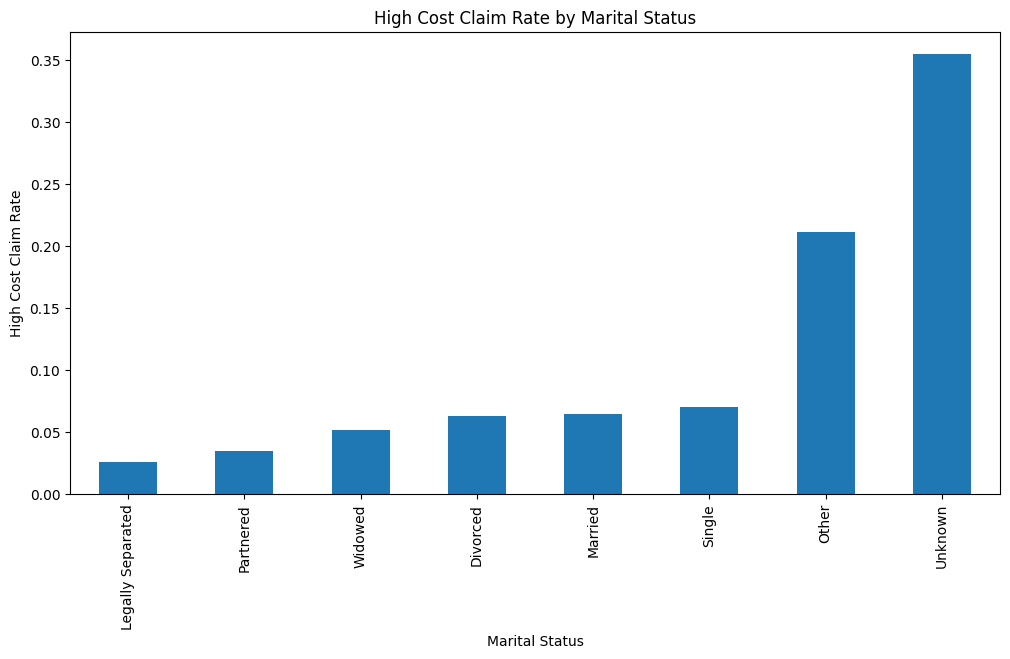

In [ ]:
import matplotlib.pyplot as plt

# Select top 20 most frequent Service Codes
top_service_codes = data['Marital Status'].value_counts().index[:20]

# Filter data for these service codes
filtered_data = data[data['Marital Status'].isin(top_service_codes)]

# Plot high-cost claim percentage for each
service_code_high_cost_ratio = filtered_data.groupby('Marital Status')['High Cost Claim'].mean().sort_values()

plt.figure(figsize=(12,6))
service_code_high_cost_ratio.plot(kind='bar')
plt.title("High Cost Claim Rate by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("High Cost Claim Rate")
plt.show()

In [ ]:
unknown_percentage = (data['Marital Status'] == 'Unknown').mean() * 100
print(f"Percentage of 'Unknown' values: {unknown_percentage:.2f}%")


Percentage of 'Unknown' values: 0.11%


In [ ]:


# Frequency Encoding for 'Marital Status'
Marital_Status_counts = data['Marital Status'].value_counts().to_dict()
data['Marital Status'] = data['Marital Status'].map(Marital_Status_counts)


# Display transformed column
print(data[['Marital Status']].head())


   Marital Status
0         65731.0
1          9278.0
2         65731.0
3         65731.0
4         65731.0


In [ ]:
data.isnull().sum()

,0
Claim ID,0
Service Date,0
Recieved Date,0
Paid Date,0
Patient ID,0
Member Age,0
Gender,7
Marital Status,9525
Ethnicity,20162
LOB,0


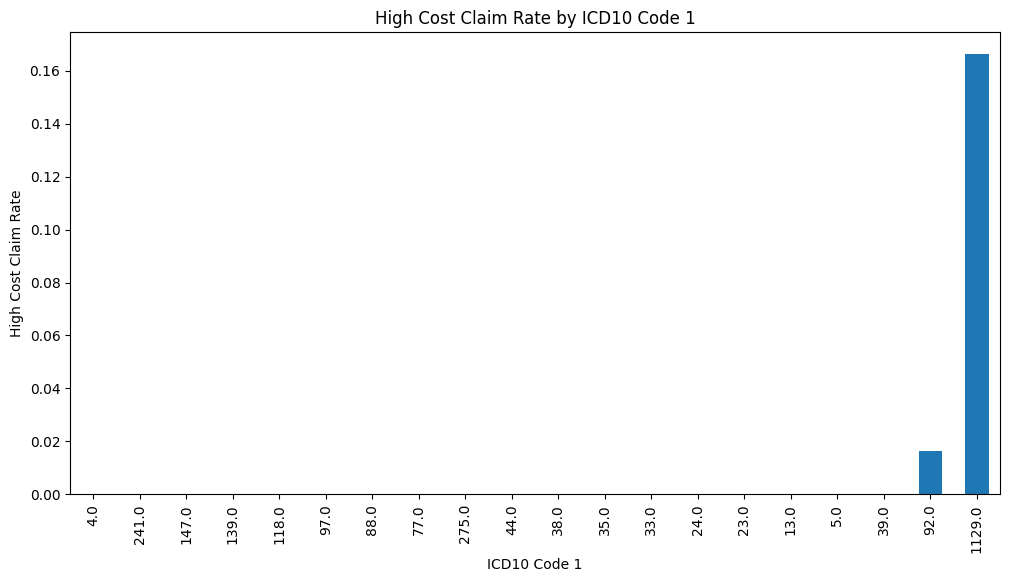

In [ ]:
import matplotlib.pyplot as plt

# Select top 20 most frequent Service Codes
top_service_codes = data['ICD10 Code 1'].value_counts().index[:20]

# Filter data for these service codes
filtered_data = data[data['ICD10 Code 1'].isin(top_service_codes)]

# Plot high-cost claim percentage for each
service_code_high_cost_ratio = filtered_data.groupby('ICD10 Code 1')['High Cost Claim'].mean().sort_values()

plt.figure(figsize=(12,6))
service_code_high_cost_ratio.plot(kind='bar')
plt.title("High Cost Claim Rate by ICD10 Code 1")
plt.xlabel("ICD10 Code 1")
plt.ylabel("High Cost Claim Rate")
plt.show()

In [ ]:
unknown_percentage = (data['ICD10 Code 2'] == 'Unknown').mean() * 100
print(f"Percentage of 'Unknown' values: {unknown_percentage:.2f}%")

Percentage of 'Unknown' values: 0.00%


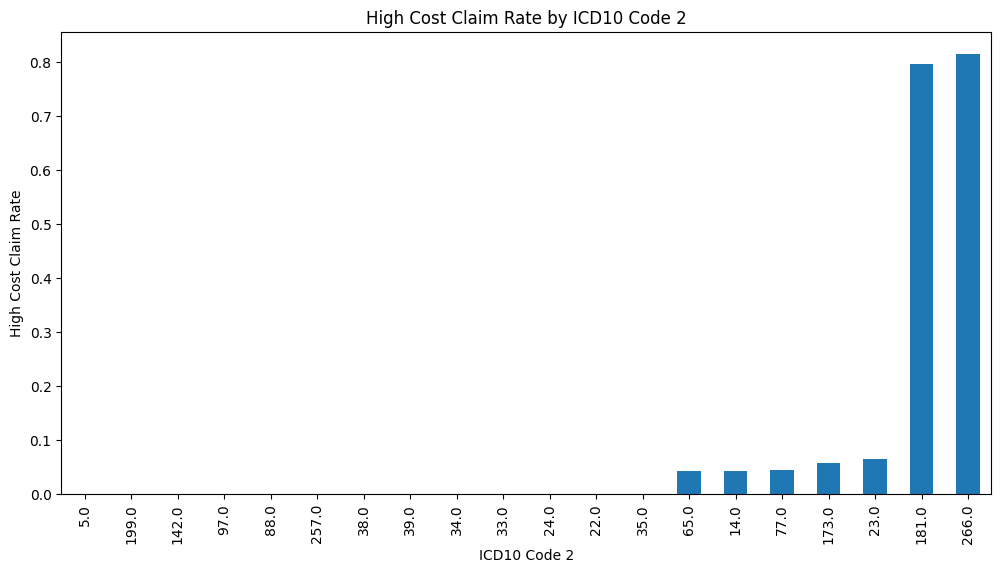

In [ ]:
import matplotlib.pyplot as plt

# Select top 20 most frequent Service Codes
top_service_codes = data['ICD10 Code 2'].value_counts().index[:20]

# Filter data for these service codes
filtered_data = data[data['ICD10 Code 2'].isin(top_service_codes)]

# Plot high-cost claim percentage for each
service_code_high_cost_ratio = filtered_data.groupby('ICD10 Code 2')['High Cost Claim'].mean().sort_values()

plt.figure(figsize=(12,6))
service_code_high_cost_ratio.plot(kind='bar')
plt.title("High Cost Claim Rate by ICD10 Code 2")
plt.xlabel("ICD10 Code 2")
plt.ylabel("High Cost Claim Rate")
plt.show()

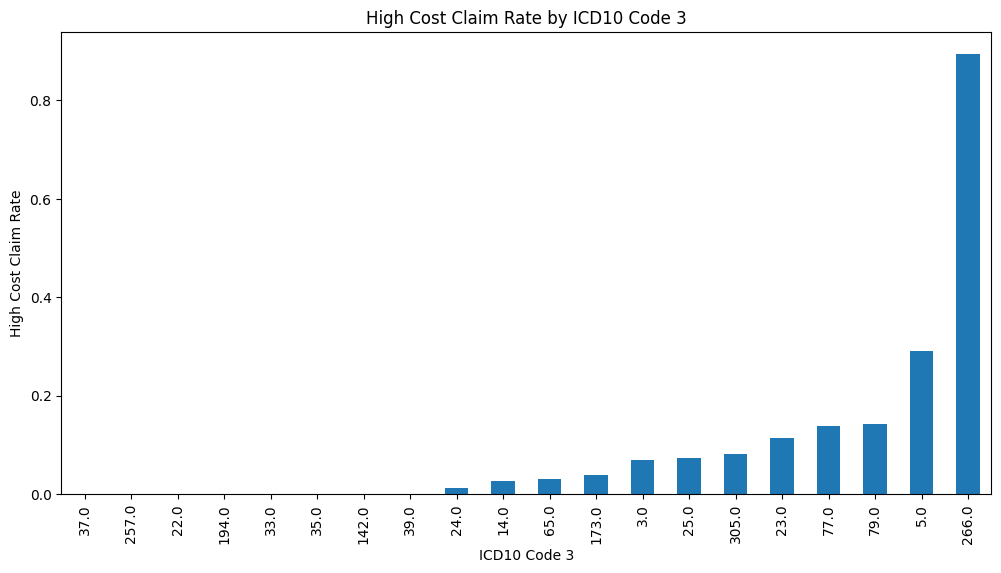

In [ ]:
import matplotlib.pyplot as plt

# Select top 20 most frequent Service Codes
top_service_codes = data['ICD10 Code 3'].value_counts().index[:20]

# Filter data for these service codes
filtered_data = data[data['ICD10 Code 3'].isin(top_service_codes)]

# Plot high-cost claim percentage for each
service_code_high_cost_ratio = filtered_data.groupby('ICD10 Code 3')['High Cost Claim'].mean().sort_values()

plt.figure(figsize=(12,6))
service_code_high_cost_ratio.plot(kind='bar')
plt.title("High Cost Claim Rate by ICD10 Code 3")
plt.xlabel("ICD10 Code 3")
plt.ylabel("High Cost Claim Rate")
plt.show()

In [ ]:
# Apply Frequency Encoding for ICD10 Code columns
icd10_columns = ['ICD10 Code 1', 'ICD10 Code 2', 'ICD10 Code 3']

for col in icd10_columns:
    icd10_counts = data[col].value_counts().to_dict()
    data[col] = data[col].map(icd10_counts)

# Display transformed columns
print(data[icd10_columns].head())

   ICD10 Code 1  ICD10 Code 2  ICD10 Code 3
0          37.0           NaN           NaN
1         357.0           NaN           NaN
2        3848.0        5108.0           NaN
3        3848.0        5108.0           NaN
4        3848.0        5108.0           NaN


In [ ]:
#replacing GENDER U to F based on high frequent values with respect to other columns
# Display rows where 'Gender' is NaN
print(data[data['Gender'].isnull()])

# Replace NaN values in 'Gender' with 1
data['Gender'] = data['Gender'].fillna(1)

                                                 Claim ID Service Date  \
115432  b0289a11a57722d424873b0ad5d5c9e62a49f66a758fb7...   2023-10-15   
115433  b0289a11a57722d424873b0ad5d5c9e62a49f66a758fb7...   2023-10-15   
115434  b0289a11a57722d424873b0ad5d5c9e62a49f66a758fb7...   2023-10-15   
115435  b0289a11a57722d424873b0ad5d5c9e62a49f66a758fb7...   2023-10-15   
115436  b0289a11a57722d424873b0ad5d5c9e62a49f66a758fb7...   2023-10-15   
115437  b0289a11a57722d424873b0ad5d5c9e62a49f66a758fb7...   2023-10-15   
139666  d2bba91cc90cf1ea6464ce6ec50aa088d31036301b87ca...   2024-03-30   

       Recieved Date  Paid Date  \
115432    2023-10-22 2023-10-25   
115433    2023-10-22 2023-10-25   
115434    2023-10-22 2023-10-25   
115435    2023-10-22 2023-10-25   
115436    2023-10-22 2023-10-25   
115437    2023-10-22 2023-10-25   
139666    2024-04-13 2024-04-19   

                                               Patient ID  Member Age  Gender  \
115432  300e2889cb96a0e3a5b56819b32e1b94f0ef9

In [ ]:
icd10_columns = ['ICD10 Code 1', 'ICD10 Code 2', 'ICD10 Code 3','Marital Status','Ethnicity']
data[icd10_columns] = data[icd10_columns].fillna(0)
#because of frequeny encodig as same null values exist in test data as well
#Replace NaN values using Imputation: Replace with 0 (Recommended for Frequency Encoding)

In [ ]:
data.isnull().sum()

,0
Claim ID,0
Service Date,0
Recieved Date,0
Paid Date,0
Patient ID,0
Member Age,0
Gender,0
Marital Status,0
Ethnicity,0
LOB,0


In [ ]:
data.dtypes

,0
Claim ID,object
Service Date,datetime64[ns]
Recieved Date,datetime64[ns]
Paid Date,datetime64[ns]
Patient ID,object
Member Age,int64
Gender,float64
Marital Status,float64
Ethnicity,float64
LOB,int64


In [ ]:
#Provider Specialty and Claim Subcategory are ignored as Claim Category and Provider Specialty are cosidered.
data = data.drop(columns=['Provider Specialty','Claim Subcategory','Claim ID', 'Patient ID','Service Date','Recieved Date','Paid Date'])
data.to_csv('cleaned_data.csv', index=False)

**Feature selection**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data1 = pd.read_csv('cleaned_data.csv')

In [ ]:
data.dtypes

,0
Member Age,int64
Gender,float64
Marital Status,float64
Ethnicity,float64
LOB,int64
Network Status,int64
Claim Category,int64
Place of Service,int64
Provider Type,int64
ICD10 Code 1,float64


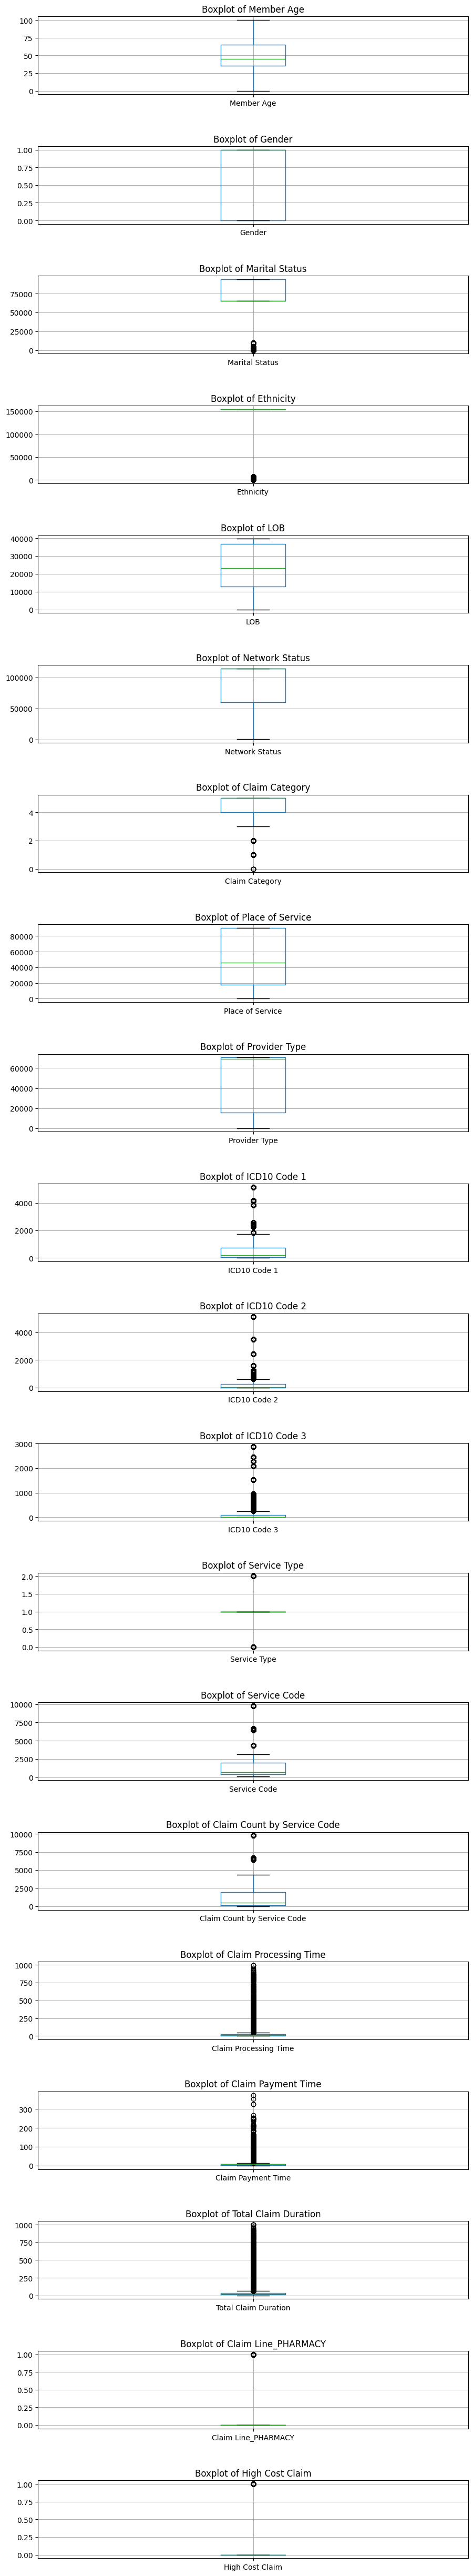

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# List of numerical columns except 'Claim ID' and 'Patient ID'
numerical_cols = ['Member Age', 'Gender', 'Marital Status', 'Ethnicity', 'LOB', 'Network Status', 'Claim Category',
                  'Place of Service', 'Provider Type', 'ICD10 Code 1', 'ICD10 Code 2', 'ICD10 Code 3', 'Service Type',
                  'Service Code', 'Claim Count by Service Code', 'Claim Processing Time',
                  'Claim Payment Time', 'Total Claim Duration', 'Claim Line_PHARMACY', 'High Cost Claim']

# Function to plot boxplots for each numerical column to visualize outliers
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(10, 50))
fig.tight_layout(pad=5.0)

for i, col in enumerate(numerical_cols):
    data.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Feature Importance from Ensemble Models
X = data1.drop(['High Cost Claim'], axis=1)
y = data1['High Cost Claim']

# Initialize the model
model = RandomForestClassifier()

# Fit the model
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]

for idx in sorted_indices:
    print(f"{X.columns[idx]}: {importances[idx]}")

Claim Category: 0.28029381891371774
Service Type: 0.1421735460874355
Place of Service: 0.07670567475954204
ICD10 Code 3: 0.07150116665177372
ICD10 Code 2: 0.06579192288500652
Total Claim Duration: 0.05541410900426956
ICD10 Code 1: 0.052216454817216706
Claim Processing Time: 0.049685647519433815
Member Age: 0.044602716435406774
Claim Payment Time: 0.03441826677090046
Network Status: 0.030281443425630265
LOB: 0.02896217690813663
Marital Status: 0.015124624163891069
Claim Count by Service Code: 0.013994094662381986
Ethnicity: 0.009871529568254248
Gender: 0.00975553711523331
Service Code: 0.008053290028691755
Provider Type: 0.007118583254051428
Claim Line_PHARMACY: 0.004035397029026493


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming 'High Cost Claim' is your target variable and it's already encoded as binary
X = data1.drop(['High Cost Claim'], axis=1)  # Exclude non-numeric ID fields
y = data1['High Cost Claim']  # Target

# Initialize the model
model = RandomForestClassifier()

# Initialize RFE with RandomForest as the estimator
selector = RFE(model, n_features_to_select=10, step=1)  # You can adjust these parameters
selector = selector.fit(X, y)

# Combine the feature names with their rankings
features_ranking = list(zip(X.columns, selector.ranking_))

# Sort features based on their ranking
sorted_features = sorted(features_ranking, key=lambda x: x[1])

# Print features and their rankings
for feature, rank in sorted_features:
    print(f"{feature}: {rank}")

Member Age: 1
Claim Category: 1
Place of Service: 1
ICD10 Code 1: 1
ICD10 Code 2: 1
ICD10 Code 3: 1
Service Type: 1
Claim Processing Time: 1
Claim Payment Time: 1
Total Claim Duration: 1
LOB: 2
Network Status: 3
Marital Status: 4
Claim Count by Service Code: 5
Gender: 6
Ethnicity: 7
Provider Type: 8
Service Code: 9
Claim Line_PHARMACY: 10


In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
# Select features and target
X = data1.drop(['High Cost Claim'], axis=1)  # Drop non-feature or target columns
y = data1['High Cost Claim']

# Apply Chi-square test
chi2_features = SelectKBest(score_func=chi2, k='all')  # 'k' can be the number of top features you want
X_kbest_features = chi2_features.fit_transform(X, y)

# Look at scores
chi_scores = pd.DataFrame({
    'Feature Name': X.columns,
    'Score': chi2_features.scores_
}).sort_values(by='Score', ascending=False)

print(chi_scores)

                   Feature Name         Score
7              Place of Service  2.852941e+08
8                 Provider Type  6.346738e+07
5                Network Status  3.852179e+07
14  Claim Count by Service Code  1.247934e+07
13                 Service Code  1.027952e+07
9                  ICD10 Code 1  6.391685e+06
3                     Ethnicity  5.932402e+06
4                           LOB  1.366939e+06
11                 ICD10 Code 3  8.520309e+05
2                Marital Status  8.379216e+05
15        Claim Processing Time  6.281134e+05
17         Total Claim Duration  6.017555e+05
10                 ICD10 Code 2  5.424800e+05
16           Claim Payment Time  3.041916e+04
6                Claim Category  2.280621e+04
12                 Service Type  5.452290e+03
1                        Gender  6.719033e+02
0                    Member Age  2.835551e+02
18          Claim Line_PHARMACY  3.060993e+01


In [ ]:
#Based on above result we can consider  only these top 12 features
# # Member Age:
# # Claim Category:
# # Place of Service:
# # Provider Type:
# # ICD10 Code 1:
# # ICD10 Code 2:
# # ICD10 Code 3:
# # Service Code:
# # Claim Processing Time:
# # Total Claim Duration:
# # Claim Payment Time:
# # Network Status
# # and 'High Cost Claim' (target variable).


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)



Training Random Forest...
Confusion Matrix for Random Forest:
 [[35291     2]
 [    9  2648]]


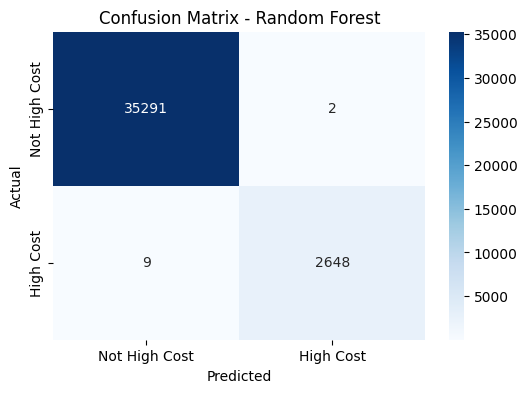

Classification Report for Random Forest:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     35293
         1.0       1.00      1.00      1.00      2657

    accuracy                           1.00     37950
   macro avg       1.00      1.00      1.00     37950
weighted avg       1.00      1.00      1.00     37950


Training SVM...
Confusion Matrix for SVM:
 [[35098   195]
 [ 2001   656]]


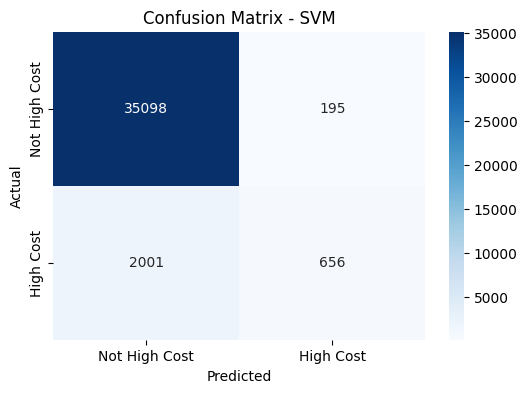

Classification Report for SVM:
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     35293
         1.0       0.77      0.25      0.37      2657

    accuracy                           0.94     37950
   macro avg       0.86      0.62      0.67     37950
weighted avg       0.93      0.94      0.93     37950


Training KNN...
Confusion Matrix for KNN:
 [[34920   373]
 [  324  2333]]


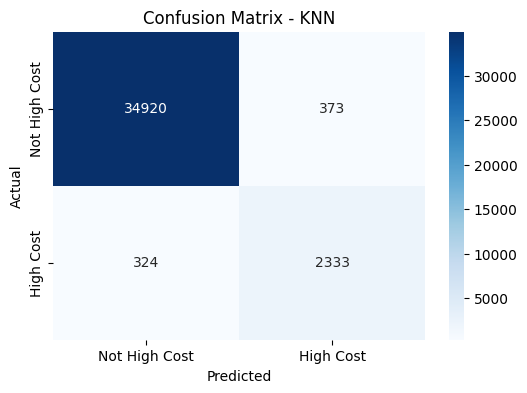

Classification Report for KNN:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     35293
         1.0       0.86      0.88      0.87      2657

    accuracy                           0.98     37950
   macro avg       0.93      0.93      0.93     37950
weighted avg       0.98      0.98      0.98     37950


Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix for Logistic Regression:
 [[35034   259]
 [ 2263   394]]


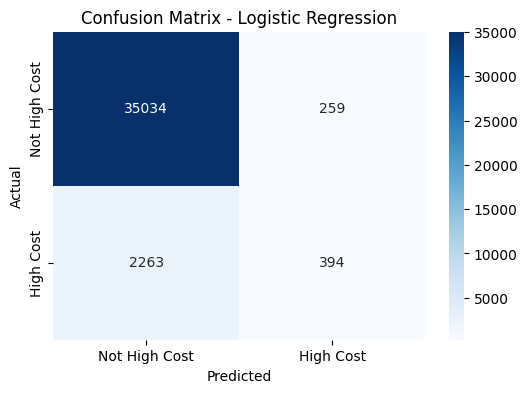

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.97     35293
         1.0       0.60      0.15      0.24      2657

    accuracy                           0.93     37950
   macro avg       0.77      0.57      0.60     37950
weighted avg       0.92      0.93      0.91     37950


Training Gradient Boosting...
Confusion Matrix for Gradient Boosting:
 [[34957   336]
 [  518  2139]]


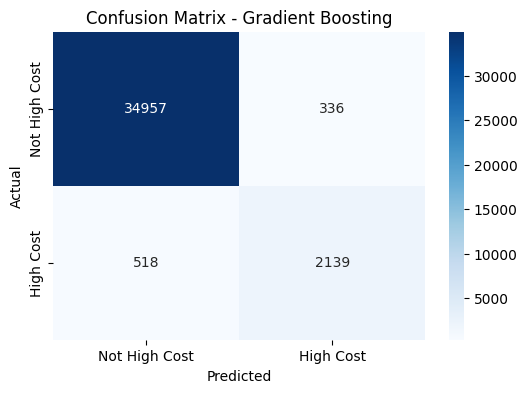

Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     35293
         1.0       0.86      0.81      0.83      2657

    accuracy                           0.98     37950
   macro avg       0.92      0.90      0.91     37950
weighted avg       0.98      0.98      0.98     37950


Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:00:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix for XGBoost:
 [[35286     7]
 [   25  2632]]


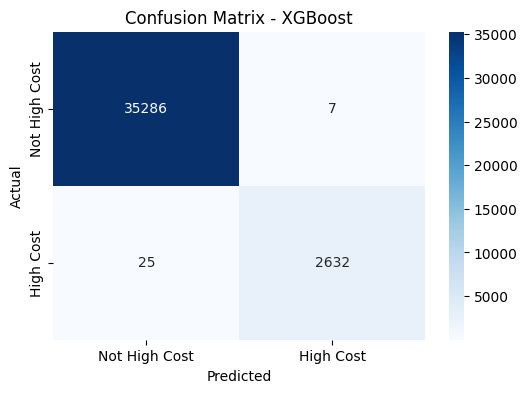

Classification Report for XGBoost:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     35293
         1.0       1.00      0.99      0.99      2657

    accuracy                           1.00     37950
   macro avg       1.00      1.00      1.00     37950
weighted avg       1.00      1.00      1.00     37950


Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10258, number of negative: 141540
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1650
[LightGBM] [Info] Number of data points in the train set: 151798, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067577 -> initscore=-2.624524
[LightGBM] [Info] Start train

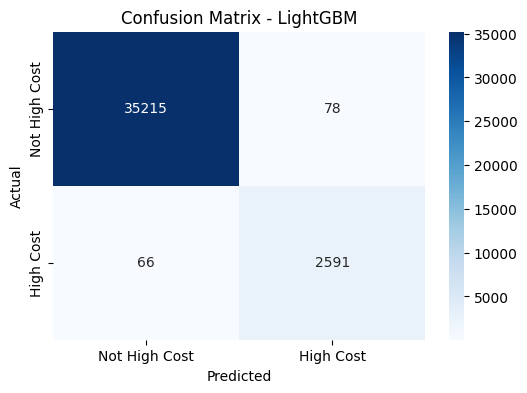

Classification Report for LightGBM:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     35293
         1.0       0.97      0.98      0.97      2657

    accuracy                           1.00     37950
   macro avg       0.98      0.99      0.99     37950
weighted avg       1.00      1.00      1.00     37950



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Define features and target
features = ['Member Age', 'Claim Category', 'Place of Service', 'Provider Type',
            'ICD10 Code 1', 'ICD10 Code 2', 'ICD10 Code 3', 'Service Code',
            'Claim Processing Time', 'Total Claim Duration', 'Claim Payment Time', 'Network Status']

X = data1[features]
y = data1['High Cost Claim']

# Split the data into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": LGBMClassifier()
}

# Train each model and display the confusion matrix
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:\n", cm)

    # Plot Confusion Matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not High Cost", "High Cost"], yticklabels=["Not High Cost", "High Cost"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # Classification Report
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred))


we can consider three models are best in terms of precison, accuray and f1score
as this is a imbalanced dataset, we need to do oversampling using SMOTE


Training Random Forest...
Confusion Matrix for Random Forest:
 [[35364     3]
 [    2  2581]]


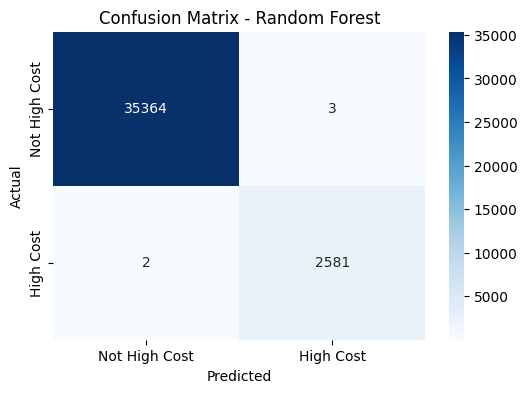

Classification Report for Random Forest:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     35367
         1.0       1.00      1.00      1.00      2583

    accuracy                           1.00     37950
   macro avg       1.00      1.00      1.00     37950
weighted avg       1.00      1.00      1.00     37950


Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:05:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix for XGBoost:
 [[35296    71]
 [   15  2568]]


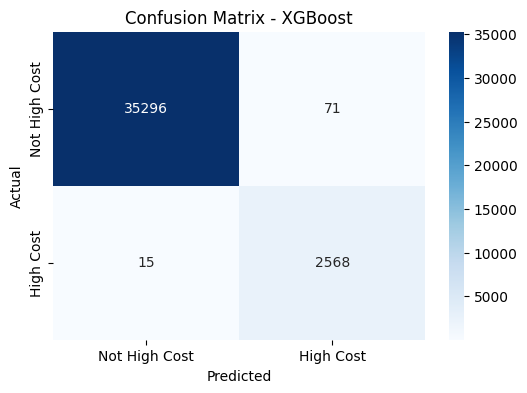

Classification Report for XGBoost:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     35367
         1.0       0.97      0.99      0.98      2583

    accuracy                           1.00     37950
   macro avg       0.99      1.00      0.99     37950
weighted avg       1.00      1.00      1.00     37950


Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 141466, number of negative: 141466
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1890
[LightGBM] [Info] Number of data points in the train set: 282932, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Confusion Matrix for LightGBM

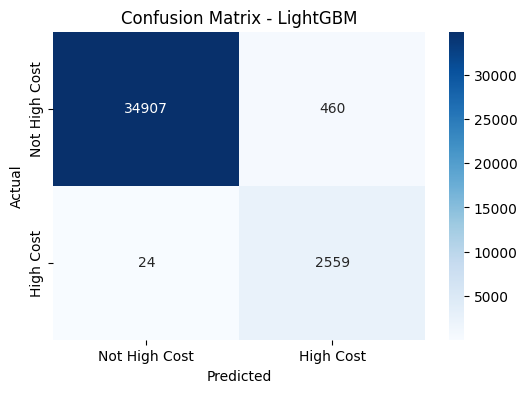

Classification Report for LightGBM:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     35367
         1.0       0.85      0.99      0.91      2583

    accuracy                           0.99     37950
   macro avg       0.92      0.99      0.95     37950
weighted avg       0.99      0.99      0.99     37950



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE

# Define features and target
features = ['Member Age', 'Claim Category', 'Place of Service', 'Provider Type',
            'ICD10 Code 1', 'ICD10 Code 2', 'ICD10 Code 3', 'Service Code',
            'Claim Processing Time', 'Total Claim Duration', 'Claim Payment Time', 'Network Status']

X = data1[features]
y = data1['High Cost Claim']

# Split the data into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define models
models = {
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": LGBMClassifier()
}

# Train each model and display the confusion matrix
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_resampled, y_train_resampled)  # Train on SMOTE-resampled data
    y_pred = model.predict(X_test)  # Predict on the original test set

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:\n", cm)

    # Plot Confusion Matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not High Cost", "High Cost"], yticklabels=["Not High Cost", "High Cost"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # Classification Report
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred))


**saving the models**

In [ ]:
import joblib

# Save each trained model to a file
joblib.dump(models["Random Forest"], "random_forest.pkl")
joblib.dump(models["XGBoost"], "xgboost.pkl")
joblib.dump(models["LightGBM"], "lightgbm.pkl")

print("Models saved successfully!")


Models saved successfully!


IMPORT MODELS

In [ ]:
import joblib

# Load the saved models
random_forest = joblib.load("random_forest.pkl")
xgboost = joblib.load("xgboost.pkl")
lightgbm = joblib.load("lightgbm.pkl")

# Store them in a dictionary again
models = {
    "Random Forest": random_forest,
    "XGBoost": xgboost,
    "LightGBM": lightgbm
}

print("Models loaded successfully!")


Models loaded successfully!


LOADING PREPROCESSED DATATEST

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
datatest=pd.read_csv('test_datatest_preprocessed.csv')
datatest.head()

,Member Age,Claim Category,Place of Service,Provider Type,ICD10 Code 1,ICD10 Code 2,ICD10 Code 3,Service Code,Claim Processing Time,Total Claim Duration,Claim Payment Time,Network Status
0,15,5,22453,17625.0,22.0,0.0,0.0,31,2,10,8,28468
1,15,5,22453,17625.0,22.0,0.0,0.0,31,2,10,8,28468
2,65,5,22453,17625.0,274.0,0.0,0.0,31,2,11,9,28468
3,65,5,22453,17625.0,274.0,0.0,0.0,31,2,11,9,28468
4,35,5,22453,17625.0,652.0,286.0,173.0,1774,1,10,9,28468


In [ ]:
# Define the same features used in training
features = ['Member Age', 'Claim Category', 'Place of Service', 'Provider Type',
            'ICD10 Code 1', 'ICD10 Code 2', 'ICD10 Code 3', 'Service Code',
            'Claim Processing Time', 'Total Claim Duration', 'Claim Payment Time', 'Network Status']

# Extract feature columns from the test dataset
X_test_final1 = datatest[features]  # Ensure the test dataset contains the correct feature columns

print("Shape of X_test_final:", X_test_final1.shape)

# Ensure column order matches the trained model
X_test_final1 = X_test_final1[final_model.feature_names_in_]


**CONSIDERING THE RANDOM FOREST AS THE BEST MODEL** FOR PREDICTIONS

In [ ]:
# Select the best model (Random Forest)
final_model = models["Random Forest"]  # Best performing model

# Predict High Cost Claim on new test data
datatest['High Cost Claim'] = final_model.predict(X_test_final1)  # Add predictions to test data

# Save the full dataset with predictions
datatest.to_csv("final_high_cost_claim_predictions.csv", index=False)

print("Finalized predictions saved successfully to 'final_high_cost_claim_predictions.csv'!")


Finalized predictions saved successfully to 'final_high_cost_claim_predictions.csv'!


In [ ]:
pred = pd.read_csv('final_high_cost_claim_predictions.csv')
pred.head()

,Member Age,Claim Category,Place of Service,Provider Type,ICD10 Code 1,ICD10 Code 2,ICD10 Code 3,Service Code,Claim Processing Time,Total Claim Duration,Claim Payment Time,Network Status,High Cost Claim
0,15,5,22453,17625.0,22.0,0.0,0.0,31,2,10,8,28468,0.0
1,15,5,22453,17625.0,22.0,0.0,0.0,31,2,10,8,28468,0.0
2,65,5,22453,17625.0,274.0,0.0,0.0,31,2,11,9,28468,0.0
3,65,5,22453,17625.0,274.0,0.0,0.0,31,2,11,9,28468,0.0
4,35,5,22453,17625.0,652.0,286.0,173.0,1774,1,10,9,28468,0.0


In [ ]:
pred.shape

(46915, 13)

In [ ]:
data1 = pd.read_csv('cleaned_data.csv')
features = ['Member Age', 'Claim Category', 'Place of Service', 'Provider Type',
            'ICD10 Code 1', 'ICD10 Code 2', 'ICD10 Code 3', 'Service Code',
            'Claim Processing Time', 'Total Claim Duration', 'Claim Payment Time', 'Network Status','High Cost Claim']

cleaneddata = data1[features]
cleaneddata.head()
cleaneddata.shape

(189748, 13)

In [ ]:

import pandas as pd

# Assuming 'pred' and 'cleaneddata' are already defined as DataFrames
# from the previous code

# Concatenate the dataframes
combined_data = pd.concat([pred, cleaneddata], axis=0)

# Save the combined dataframe to a CSV file
combined_data.to_csv('combined_data.csv', index=False)


In [ ]:
df = pd.read_csv('combined_data.csv')
df.head()

,Member Age,Claim Category,Place of Service,Provider Type,ICD10 Code 1,ICD10 Code 2,ICD10 Code 3,Service Code,Claim Processing Time,Total Claim Duration,Claim Payment Time,Network Status,High Cost Claim
0,15,5,22453,17625.0,22.0,0.0,0.0,31,2,10,8,28468,0.0
1,15,5,22453,17625.0,22.0,0.0,0.0,31,2,10,8,28468,0.0
2,65,5,22453,17625.0,274.0,0.0,0.0,31,2,11,9,28468,0.0
3,65,5,22453,17625.0,274.0,0.0,0.0,31,2,11,9,28468,0.0
4,35,5,22453,17625.0,652.0,286.0,173.0,1774,1,10,9,28468,0.0


In [ ]:
df.shape

(236663, 13)

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('DSU_Dataset.csv')
# Convert date columns to datetime format
data['Service Date'] = pd.to_datetime(data['Service Date'], format="%d-%m-%Y")
data['Recieved Date'] = pd.to_datetime(data['Recieved Date'], format="%d-%m-%Y")
data['Paid Date'] = pd.to_datetime(data['Paid Date'], format="%d-%m-%Y")

# Create new features
data['Claim Processing Time'] = (data['Recieved Date'] - data['Service Date']).dt.days
data['Claim Payment Time'] = (data['Paid Date'] - data['Recieved Date']).dt.days
data['Total Claim Duration'] = (data['Paid Date'] - data['Service Date']).dt.days

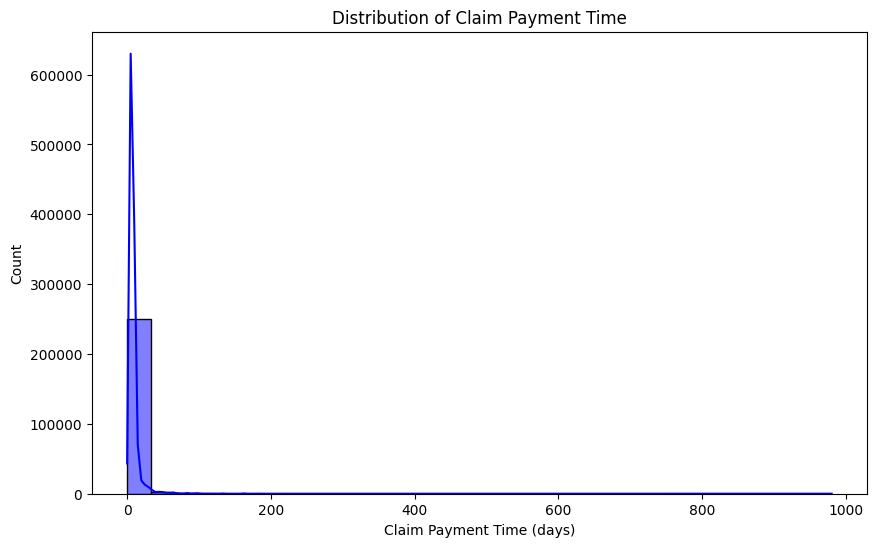

In [ ]:
# Inspect the distribution of Claim Payment Time
import matplotlib.pyplot as plt
import seaborn as sns

claim_times = data['Claim Payment Time'].dropna()  # drop NaN if present

plt.figure(figsize=(10, 6))
sns.histplot(claim_times, kde=True, color='blue', bins=30)
plt.title("Distribution of Claim Payment Time")
plt.xlabel("Claim Payment Time (days)")
plt.ylabel("Count")
plt.show()

In [ ]:
#Perform Normality test

from scipy.stats import shapiro
from scipy.stats import kstest

# Shapiro-Wilk test
stat, p_value = shapiro(claim_times)
print("Shapiro-Wilk Test:")
print(f"  Test Statistic = {stat:.4f}")
print(f"  p-value        = {p_value:.4e}")

if p_value < 0.05:
    print("=> We reject the null hypothesis of normality (data is likely non-normal).")
else:
    print("=> We fail to reject the null hypothesis (data is likely normal).")


Shapiro-Wilk Test:
  Test Statistic = 0.3686
  p-value        = 6.9932e-193
=> We reject the null hypothesis of normality (data is likely non-normal).


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 253686.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Because the p-value < 0.05 and the Claim Payment Time is heavily skewed
# So we consider using the percentile-based thresold
# We label a claim as “delayed” if Claim Payment Time is above the 95th percentile or 99th percentile.

# =====================================================================
# 3) FORECAST: MONTHLY DELAYED CLAIMS (using Service Date + outliers)
# =====================================================================
# a) Inspect distribution & define delayed claims
threshold_95 = data['Claim Payment Time'].quantile(0.95)
data['IsDelayed'] = (data['Claim Payment Time'] > threshold_95).astype(int)

In [ ]:
# Convert 'Service Date' (or whichever date is most relevant) to a Month period
data['Serviced_Month'] = data['Service Date'].dt.to_period('M')

# Sum delayed claims per month
monthly_delayed = data.groupby('Serviced_Month')['IsDelayed'].sum().reset_index()

# Prophet requires a datetime column named 'ds' and a target column named 'y'
# Convert the period to a Timestamp
monthly_delayed['Serviced_Month'] = monthly_delayed['Serviced_Month'].dt.to_timestamp()

monthly_delayed.rename(columns={'Serviced_Month': 'ds', 'IsDelayed': 'y'}, inplace=True)

# Sort by date just to be sure
monthly_delayed.sort_values('ds', inplace=True)

monthly_delayed.head()
# Here ds is the first day of each month, and y is the number of delayed claims in that month.

,ds,y
0,2021-12-01,40
1,2022-01-01,318
2,2022-02-01,334
3,2022-03-01,254
4,2022-04-01,219


In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet
import matplotlib.pyplot as plt

# 1) Instantiate the model
model_delay = Prophet(
    yearly_seasonality=True,   # monthly data often benefits from a yearly pattern
    weekly_seasonality=False,
    daily_seasonality=False    # daily seasonality not needed for monthly data
)

# 2) Fit on your historical monthly data
model_delay.fit(monthly_delayed)

# 3) Make a future dataframe for 6 months
future_periods = 6
future = model_delay.make_future_dataframe(periods=future_periods, freq='M')

# 4) Generate Forecast
forecast = model_delay.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpcgs53_zi/sepi03zz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcgs53_zi/ngqmzhmr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95613', 'data', 'file=/tmp/tmpcgs53_zi/sepi03zz.json', 'init=/tmp/tmpcgs53_zi/ngqmzhmr.json', 'output', 'file=/tmp/tmpcgs53_zi/prophet_modeluefvh4_f/prophet_model-20250222191536.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:15:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:15:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
34,2024-10-01,627.158805,449.397185,795.132006
35,2024-11-01,311.711421,151.301691,473.912157
36,2024-12-01,184.798629,19.748910,369.064848
37,2025-01-01,263.269174,104.022994,441.049939
38,2025-01-31,331.492084,164.886115,496.299787
39,2025-02-28,372.934428,207.194899,555.077097
40,2025-03-31,481.828619,309.400135,650.273768
41,2025-04-30,334.053580,152.972867,494.404008
42,2025-05-31,679.809235,523.042917,845.659601
43,2025-06-30,991.836299,823.757213,1176.386723


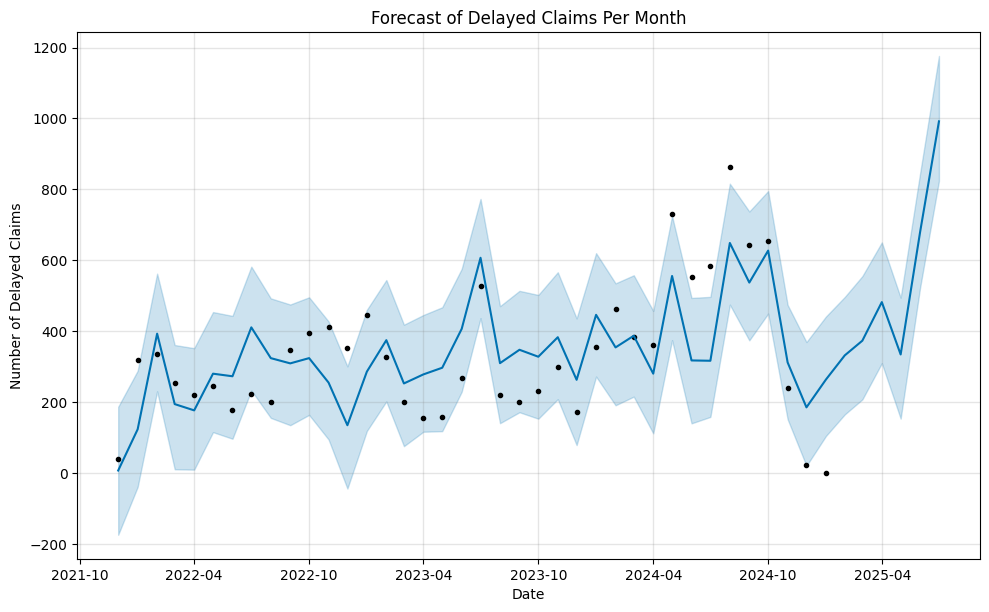

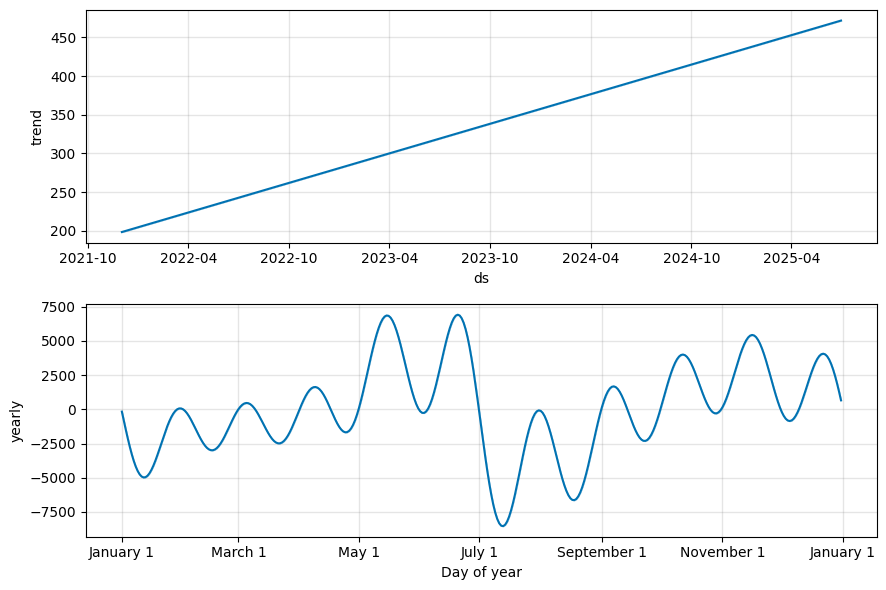

In [ ]:
fig = model_delay.plot(forecast)
plt.title("Forecast of Delayed Claims Per Month")
plt.xlabel("Date")
plt.ylabel("Number of Delayed Claims")
plt.show()

fig2 = model.plot_components(forecast)
plt.show()

Increasing Trend: The forecast shows a steady increase in the number of delayed claims over time, suggesting an upward trend that may require strategic operational adjustments to manage claim processing efficiency.

Seasonal Patterns: The data exhibits clear seasonal fluctuations with peaks typically around mid-year and end-year, indicating times when claims processing might be particularly strained and could benefit from preemptive resource allocation.

Growing Uncertainty: The confidence intervals in the forecasts widen over time, highlighting increased uncertainty in predictions as you look further into the future, underscoring the importance of continuous monitoring and model updating.

Operational Insights: The analysis of yearly seasonality and overall trend provides critical insights for improving claims processing practices, suggesting potential for policy adjustments and technological enhancements to reduce delays during peak periods.